In [1]:
import numpy as np
from typing import List, Callable
import matplotlib.pyplot as plt
import scipy
import tqdm.auto as tqdm
import scipy.stats as st

XM = 15

In [8]:
def draw_pareto(num_samples: int, alpha: float, xm: float) -> np.ndarray:
    
    return (1 + np.random.pareto(a = alpha, size = num_samples)) * xm

def plot_histogram(data: np.ndarray, num_bins):
    
    plt.hist(data, bins = num_bins, density = False)
    plt.show()
    
def get_one_point_likelihood(x: float, xm: float) -> Callable:
    
    return lambda alpha: 0 if x < xm else np.log((alpha * xm**alpha)/(x**(alpha + 1)))

def get_sample_likelihood(sample: np.ndarray, xm: float) -> Callable:
    
    sum_likelihood = lambda alpha: np.sum([get_one_point_likelihood(x=x, xm = xm)(alpha = alpha) for x in sample])
    return sum_likelihood 

def get_maximum_likelihood_alpha(sample, initial, xm) -> float:
    
    negative_likelihood_func = lambda alpha: - (get_sample_likelihood(sample, xm = xm))(alpha = alpha)
    best_alpha = scipy.optimize.fmin(negative_likelihood_func, x0 = initial, maxiter = 1000000)
    return best_alpha


def plot_sample_likelihood_by_alpha(sample, xm):
    
    alphas = np.arange(0.05, 20, 0.05)
    likelihoods = []
    for alpha in tqdm.tqdm(alphas):
        
        likelihoods.append(get_sample_likelihood(sample, xm = xm)(alpha = alpha))

    plt.plot(alphas, likelihoods)
    plt.show()

def calc_confidence_interval(xm, alpha, n = 100):
    
    alphas = []
    for i in tqdm.tqdm(range(n)):
        
        sample = draw_pareto(1000, alpha = alpha, xm = xm)
        alpha = get_maximum_likelihood_alpha(sample, initial = 1, xm = xm)
        alphas.append(alpha.item())

    # confidence = 0.5
    
    interval50 = st.t.interval(0.5, len(alphas)-1, loc=np.mean(alphas), scale=st.sem(alphas))
    
    # confidence = 0.95
    
    interval95 = st.t.interval(0.95, len(alphas)-1, loc=np.mean(alphas), scale=st.sem(alphas))
   
    # confidence = 0.99
    
    interval99 = st.t.interval(0.95, len(alphas)-1, loc=np.mean(alphas), scale=st.sem(alphas))
    
    print("conf-50: {}, conf-95: {}, conf-99: {}".format(interval50, interval95, interval99))
    print("std: {}".format(np.std(alphas)))    
    
    plot_histogram(alphas, num_bins = 50)

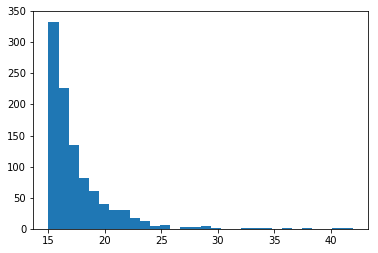

In [3]:
sample = draw_pareto(1000, alpha = 7, xm = XM)
plot_histogram(data = sample, num_bins = 30)

In [4]:
one_point_likelihood = get_one_point_likelihood(x = 5.5, xm = XM)
sample_likelihood  = get_sample_likelihood(sample, xm = XM)
print(one_point_likelihood(alpha = 7))
print(sample_likelihood(alpha = 7))
print(get_maximum_likelihood_alpha(sample, initial = 3, xm = XM))


0
-1914.8564733268704
Optimization terminated successfully.
         Current function value: 1914.819475
         Iterations: 19
         Function evaluations: 38
[6.94013672]


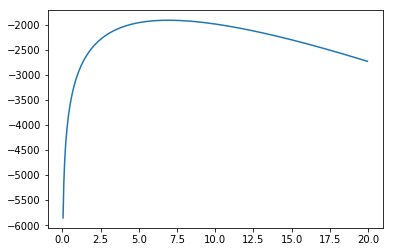

In [5]:
plot_sample_likelihood_by_alpha(sample, xm = XM)

Optimization terminated successfully.
         Current function value: 1904.336368
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1945.865290
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1902.464825
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1883.702403
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1883.958590
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1941.078457
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1974.665122
         Iterations: 22
         Function evaluations: 44
Optimization 

Optimization terminated successfully.
         Current function value: 1895.893138
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1814.526901
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1775.599180
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1830.151870
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1809.029508
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1802.523199
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1881.193567
         Iterations: 22
         Function evaluations: 44
Optimization 

Optimization terminated successfully.
         Current function value: 2082.935838
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2063.939809
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2077.772365
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2041.114765
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2080.160278
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2076.492713
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2096.423815
         Iterations: 21
         Function evaluations: 42
Optimization 

Optimization terminated successfully.
         Current function value: 1825.439164
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1721.423460
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1766.096358
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1772.979200
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1727.951109
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1744.737587
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1747.558664
         Iterations: 22
         Function evaluations: 44
Optimization 

Optimization terminated successfully.
         Current function value: 2318.759575
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2383.092400
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 2325.396282
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 2322.912948
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 2373.921838
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 2373.171400
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 2374.972592
         Iterations: 20
         Function evaluations: 40
Optimization 

Optimization terminated successfully.
         Current function value: 2579.718154
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 2600.402532
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 2533.764635
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 2526.378604
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 2476.900616
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 2420.750194
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 2429.870363
         Iterations: 20
         Function evaluations: 40
Optimization 

Optimization terminated successfully.
         Current function value: 2719.467767
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 2740.256080
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 2761.168335
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 2762.558750
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 2800.737048
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 2841.361028
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 2847.053250
         Iterations: 19
         Function evaluations: 38
Optimization 

Optimization terminated successfully.
         Current function value: 3046.173557
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 2986.016347
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 2890.614472
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 2898.101791
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 2877.924987
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 2845.623509
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 2836.344274
         Iterations: 19
         Function evaluations: 38
Optimization 

Optimization terminated successfully.
         Current function value: 2976.946857
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 2951.037325
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 3014.218348
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 2972.080210
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 2934.161273
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 2953.283502
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 2947.573820
         Iterations: 19
         Function evaluations: 38
Optimization 

Optimization terminated successfully.
         Current function value: 2318.313434
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2324.653446
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 2299.768840
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2268.884475
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2293.071966
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2322.856583
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 2294.740211
         Iterations: 21
         Function evaluations: 42
Optimization 

Optimization terminated successfully.
         Current function value: 2209.316767
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2135.968939
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2127.380642
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2090.995072
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2023.181714
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2079.195138
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2025.150577
         Iterations: 21
         Function evaluations: 42
Optimization 

Optimization terminated successfully.
         Current function value: 1783.969435
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1777.665985
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1820.278013
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1773.422906
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1730.110061
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1712.621432
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1655.090660
         Iterations: 22
         Function evaluations: 44
Optimization 

Optimization terminated successfully.
         Current function value: 1579.017813
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1619.148765
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1665.806613
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1681.100575
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1700.644280
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1680.281500
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1690.434443
         Iterations: 22
         Function evaluations: 44
Optimization 

Optimization terminated successfully.
         Current function value: 1773.319411
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1705.406466
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1709.924038
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1806.989452
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1766.234947
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1741.244481
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1766.584650
         Iterations: 22
         Function evaluations: 44
Optimization 

Optimization terminated successfully.
         Current function value: 1807.679244
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1867.884382
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1802.661272
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1840.351589
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1755.983021
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1764.615377
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1738.631729
         Iterations: 22
         Function evaluations: 44
Optimization 

Optimization terminated successfully.
         Current function value: 2048.269725
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 1974.715005
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1992.528520
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 2013.600880
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 1988.115490
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 1966.574315
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1964.310070
         Iterations: 22
         Function evaluations: 44
Optimization 

Optimization terminated successfully.
         Current function value: 1833.931295
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1845.946946
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1850.153260
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1868.235914
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1854.624028
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1858.153188
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1845.190957
         Iterations: 22
         Function evaluations: 44
Optimization 

Optimization terminated successfully.
         Current function value: 1700.931688
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1750.189863
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1752.981581
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1761.817531
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1713.658091
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1770.648407
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1744.031174
         Iterations: 22
         Function evaluations: 44
Optimization 

Optimization terminated successfully.
         Current function value: 1929.174845
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1920.207393
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1955.046441
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1931.815173
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1933.300544
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1932.405966
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1923.658019
         Iterations: 22
         Function evaluations: 44
Optimization 

Optimization terminated successfully.
         Current function value: 1477.417384
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1475.131862
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1525.152548
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1531.650073
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1554.792215
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1494.288599
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1488.762113
         Iterations: 23
         Function evaluations: 46
Optimization 

Optimization terminated successfully.
         Current function value: 1051.911752
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1114.010879
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1074.275281
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1072.462748
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1077.087659
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1115.705011
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1139.348936
         Iterations: 24
         Function evaluations: 48
Optimization 

Optimization terminated successfully.
         Current function value: 1232.141218
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1266.003803
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1263.289822
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1310.870695
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1314.967403
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1295.740485
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1301.385961
         Iterations: 23
         Function evaluations: 46
Optimization 

Optimization terminated successfully.
         Current function value: 1218.738772
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1251.500336
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1232.977662
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1265.417520
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1234.242912
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1179.162431
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1178.787665
         Iterations: 24
         Function evaluations: 48
Optimization 

Optimization terminated successfully.
         Current function value: 1214.566555
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1153.947455
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1075.312674
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1105.947193
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1110.409178
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1071.287561
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1033.116276
         Iterations: 24
         Function evaluations: 48
Optimization 

Optimization terminated successfully.
         Current function value: 1096.940844
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1086.698618
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1085.146386
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1101.760888
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1088.619952
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1038.809771
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1064.378969
         Iterations: 24
         Function evaluations: 48
Optimization 

Optimization terminated successfully.
         Current function value: 1116.507361
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1084.880032
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1136.683830
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1150.002792
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1121.394520
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1104.327961
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1070.598117
         Iterations: 24
         Function evaluations: 48
Optimization 

Optimization terminated successfully.
         Current function value: 1172.535112
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1165.653153
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1130.276144
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1082.975948
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1052.946947
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1048.357354
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1016.326021
         Iterations: 24
         Function evaluations: 48
Optimization 

Optimization terminated successfully.
         Current function value: 880.707577
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 868.109569
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 855.397141
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 816.880357
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 853.592596
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 846.866811
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 836.397567
         Iterations: 25
         Function evaluations: 50
Optimization termina

Optimization terminated successfully.
         Current function value: 604.298791
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 621.128653
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 657.430410
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 572.831236
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 547.250138
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 525.838903
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 445.087726
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 49.595891
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 80.670279
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 104.954052
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 135.488880
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 156.081730
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 154.797308
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 151.105602
         Iterations: 27
         Function evaluations: 54
Optimization terminate

Optimization terminated successfully.
         Current function value: 183.289232
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 172.175273
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 220.206512
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 189.185759
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 178.021394
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 179.803065
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 197.985627
         Iterations: 27
         Function evaluations: 54
Optimization termina

Optimization terminated successfully.
         Current function value: -25.635411
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -107.730561
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -146.220321
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -208.386012
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -205.547455
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -220.099615
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -205.370930
         Iterations: 28
         Function evaluations: 56
Optimization t

Optimization terminated successfully.
         Current function value: -222.065219
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -301.200735
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -286.342122
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -231.724999
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -237.073059
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -246.934970
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -253.238206
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -170.587455
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -234.880860
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -177.726166
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -209.078658
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -199.572909
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -204.029000
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -194.278074
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -191.819497
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -175.619165
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -145.890497
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -150.299357
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -145.690047
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -162.816743
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -176.859327
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -385.274497
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -415.846973
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -445.202455
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -455.473641
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -431.275116
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -466.630784
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -520.005323
         Iterations: 29
         Function evaluations: 58
Optimization 

Optimization terminated successfully.
         Current function value: -161.198429
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -175.325716
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -184.473930
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -187.071593
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -176.347908
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -133.169034
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -110.861169
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: 398.250711
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 379.553636
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 477.428863
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 420.699496
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 429.512033
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 410.660313
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 369.238878
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 281.700919
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 305.526268
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 266.944956
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 315.179214
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 319.492770
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 353.964892
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 362.961383
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 478.599439
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 536.364515
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 525.570445
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 547.102200
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 520.504923
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 544.050368
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 554.091511
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 640.617358
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 611.797946
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 592.172266
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 592.525045
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 561.478574
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 558.727964
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 536.328763
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 866.159547
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 906.982250
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 903.129625
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 870.785155
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 840.467169
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 802.426497
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 829.007144
         Iterations: 25
         Function evaluations: 50
Optimization termina

Optimization terminated successfully.
         Current function value: 896.021431
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 947.849425
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 1005.656888
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 974.048072
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 967.529906
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 925.602065
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 936.326453
         Iterations: 25
         Function evaluations: 50
Optimization termin

Optimization terminated successfully.
         Current function value: 846.365297
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 796.712503
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 818.230720
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 781.901950
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 762.307720
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 790.928915
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 847.327985
         Iterations: 25
         Function evaluations: 50
Optimization termina

Optimization terminated successfully.
         Current function value: 1070.188692
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1071.336639
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1030.885688
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1018.672811
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 980.319958
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 979.351042
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 980.167451
         Iterations: 24
         Function evaluations: 48
Optimization ter

Optimization terminated successfully.
         Current function value: 1191.137305
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1207.476333
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1221.118581
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1223.869151
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1242.646192
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1241.753974
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1264.672679
         Iterations: 24
         Function evaluations: 48
Optimization 

Optimization terminated successfully.
         Current function value: 1044.463857
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1049.107412
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 945.871967
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 921.990454
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 938.794269
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 944.648955
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 887.674307
         Iterations: 25
         Function evaluations: 50
Optimization termi

Optimization terminated successfully.
         Current function value: 1161.988873
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1162.248920
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1197.370046
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1210.184415
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1265.666618
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1253.363110
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1226.416074
         Iterations: 24
         Function evaluations: 48
Optimization 

Optimization terminated successfully.
         Current function value: 1149.295951
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1116.801052
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1161.710368
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1186.303245
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1174.486489
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1176.714814
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1155.282153
         Iterations: 24
         Function evaluations: 48
Optimization 

Optimization terminated successfully.
         Current function value: 1223.032551
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1212.097661
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1184.837697
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1228.320040
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1226.233419
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1244.953750
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1216.704221
         Iterations: 24
         Function evaluations: 48
Optimization 

Optimization terminated successfully.
         Current function value: 1462.282343
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1416.005773
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1434.825146
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1431.406515
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1423.879046
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1379.182430
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1416.952466
         Iterations: 23
         Function evaluations: 46
Optimization 

Optimization terminated successfully.
         Current function value: 1717.015525
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1752.380770
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1714.023046
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1711.904761
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1656.766644
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1631.796803
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1608.881820
         Iterations: 23
         Function evaluations: 46
Optimization 

Optimization terminated successfully.
         Current function value: 1576.682924
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1636.714678
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1666.287012
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1677.159343
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1642.090640
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1606.862057
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1613.630956
         Iterations: 23
         Function evaluations: 46
Optimization 

Optimization terminated successfully.
         Current function value: 1513.405209
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1552.657168
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1471.050712
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1442.188277
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1448.725512
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1421.822348
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1465.492760
         Iterations: 23
         Function evaluations: 46
Optimization 

Optimization terminated successfully.
         Current function value: 1247.947620
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1246.807919
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1212.867742
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1266.997711
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1225.021782
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1273.839941
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1304.010344
         Iterations: 23
         Function evaluations: 46
Optimization 

Optimization terminated successfully.
         Current function value: 1251.817103
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1271.222041
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1320.170108
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1308.227256
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1299.322575
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1324.054140
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1307.803525
         Iterations: 23
         Function evaluations: 46
Optimization 

Optimization terminated successfully.
         Current function value: 1361.762062
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1300.995885
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: 1290.676286
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1262.741552
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1264.160228
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1263.357410
         Iterations: 24
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: 1203.397806
         Iterations: 24
         Function evaluations: 48
Optimization 

Optimization terminated successfully.
         Current function value: 694.306731
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 640.145359
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 611.358120
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 549.558001
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 561.274859
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 564.505624
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 560.940081
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 426.656541
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 410.467996
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 428.356850
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 455.888647
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 515.385935
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 541.700259
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 545.841933
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 598.848602
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 651.883872
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 640.947610
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 688.127767
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 712.475418
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 718.853957
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 748.801043
         Iterations: 25
         Function evaluations: 50
Optimization termina

Optimization terminated successfully.
         Current function value: 439.441688
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 481.098884
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 434.535279
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 450.508034
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 454.312267
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 435.762954
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 448.998780
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 87.516516
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 93.925762
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 46.653183
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 35.783132
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 103.701829
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 95.814125
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 124.484763
         Iterations: 27
         Function evaluations: 54
Optimization terminated s

Optimization terminated successfully.
         Current function value: 180.444202
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 173.229101
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 143.161586
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 156.809029
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 142.296597
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 172.049163
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 171.393877
         Iterations: 27
         Function evaluations: 54
Optimization termina

Optimization terminated successfully.
         Current function value: 526.107921
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 528.461148
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 610.026365
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 577.805055
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 531.180159
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 512.043220
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 511.169314
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 373.280106
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 367.082120
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 431.816167
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 425.313822
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 468.667734
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 477.054801
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 496.781302
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 732.031135
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 762.079698
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 759.298291
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 728.193952
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 724.469218
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 738.843107
         Iterations: 25
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 743.383333
         Iterations: 25
         Function evaluations: 50
Optimization termina

Optimization terminated successfully.
         Current function value: 551.177267
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 532.768271
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 506.848950
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 512.185705
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 498.950566
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 477.820927
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 470.897024
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 25.291850
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -48.399006
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -40.619873
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -33.360102
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -23.167685
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -32.854593
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -24.664009
         Iterations: 27
         Function evaluations: 54
Optimization terminat

Optimization terminated successfully.
         Current function value: -70.534310
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -53.631006
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -48.186641
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -44.451247
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -7.110503
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -25.675289
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -11.444582
         Iterations: 27
         Function evaluations: 54
Optimization terminat

Optimization terminated successfully.
         Current function value: -255.362905
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -257.536299
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -274.952053
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -298.279579
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -318.946960
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -296.345110
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -286.114756
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -305.840920
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -275.939865
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -228.202819
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -215.786865
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -245.909749
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -238.825749
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -202.940644
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -185.212238
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -173.471259
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -159.913566
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -161.884785
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -130.405420
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -137.342935
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -166.936762
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -130.837052
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -104.269594
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -152.722988
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -124.228018
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -81.861461
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -143.173865
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -86.325020
         Iterations: 27
         Function evaluations: 54
Optimization te

Optimization terminated successfully.
         Current function value: -434.627810
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -469.329408
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -499.924063
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -546.509336
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -521.798599
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -504.617868
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -543.786273
         Iterations: 29
         Function evaluations: 58
Optimization 

Optimization terminated successfully.
         Current function value: -127.891257
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -71.462471
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -114.416690
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -99.360526
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -108.291699
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -95.211631
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -117.992595
         Iterations: 28
         Function evaluations: 56
Optimization ter

Optimization terminated successfully.
         Current function value: -121.977892
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -158.473643
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -196.435845
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -181.661999
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -142.292499
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -113.710336
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -106.088045
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: 165.623325
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 133.562124
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 131.395074
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 150.019889
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 177.296669
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 227.485630
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 306.895087
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 446.622036
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 462.101867
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 473.177695
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 535.702586
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 456.969106
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 438.740318
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 469.600210
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 303.886901
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 285.847035
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 281.041928
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 258.489737
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 236.509882
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 221.187486
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 253.842152
         Iterations: 27
         Function evaluations: 54
Optimization termina

Optimization terminated successfully.
         Current function value: 258.688535
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 220.220953
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 172.163731
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 160.540941
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 175.049133
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 186.757346
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 190.953245
         Iterations: 27
         Function evaluations: 54
Optimization termina

Optimization terminated successfully.
         Current function value: 153.109508
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 102.192663
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 66.726309
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 53.859573
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 58.048656
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 63.406595
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 131.320727
         Iterations: 27
         Function evaluations: 54
Optimization terminated 

Optimization terminated successfully.
         Current function value: 63.727431
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 100.291652
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 116.874525
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 98.294025
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 137.185163
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 138.707726
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 103.145695
         Iterations: 27
         Function evaluations: 54
Optimization terminate

Optimization terminated successfully.
         Current function value: 313.308078
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 330.604673
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 310.816397
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 371.050005
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 323.742753
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 331.627115
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 300.056705
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 53.706419
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -1.372566
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 6.436387
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 26.556833
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 35.767788
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 28.578732
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 6.792429
         Iterations: 27
         Function evaluations: 54
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 142.055437
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 114.943547
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 131.896439
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 71.370563
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 33.915824
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -14.943413
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 13.243334
         Iterations: 27
         Function evaluations: 54
Optimization terminated

Optimization terminated successfully.
         Current function value: 192.364404
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 145.151088
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 171.884962
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 157.209081
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 118.346671
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 42.015425
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 57.204335
         Iterations: 27
         Function evaluations: 54
Optimization terminate

Optimization terminated successfully.
         Current function value: -78.004381
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -84.739680
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -70.313583
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -78.261379
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -64.543944
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -61.029638
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -64.693340
         Iterations: 27
         Function evaluations: 54
Optimization termina

Optimization terminated successfully.
         Current function value: -8.851012
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 5.141475
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -45.350705
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -17.334349
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -55.725471
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -57.773348
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -22.895482
         Iterations: 27
         Function evaluations: 54
Optimization terminated

Optimization terminated successfully.
         Current function value: -86.927225
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -57.636860
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -76.194538
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -139.851940
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -128.973486
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -162.824263
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -142.784074
         Iterations: 28
         Function evaluations: 56
Optimization ter

Optimization terminated successfully.
         Current function value: -305.147586
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -332.430834
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -344.964385
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -378.237997
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -334.057974
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -331.156348
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -324.389438
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -341.930410
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -302.551607
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -362.630150
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -360.712630
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -332.703389
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -349.278665
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -345.933079
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -161.707181
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -136.285357
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -143.913562
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -163.752391
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -165.395122
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -178.035536
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -169.005569
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -296.640549
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -294.494041
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -318.294557
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -274.870243
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -290.153681
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -268.171191
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -241.745306
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -386.581943
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -332.687089
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -289.556925
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -293.878116
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -274.974076
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -274.704872
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -283.293909
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -413.028805
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -396.765531
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -422.555267
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -407.730422
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -380.716752
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -454.883869
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -428.168868
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -255.772685
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -264.372335
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -253.263146
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -228.268440
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -251.425228
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -242.499019
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -240.000631
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -178.234784
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -174.804657
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -204.321240
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -243.711666
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -295.611904
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -325.011652
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -321.216657
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -245.311833
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -173.321583
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -180.067298
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -180.942331
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -178.367804
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -195.611403
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -233.176902
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -208.437639
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -187.938563
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -137.904944
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -131.576673
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -146.854546
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -120.943398
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -60.561159
         Iterations: 27
         Function evaluations: 54
Optimization t

Optimization terminated successfully.
         Current function value: 255.865951
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 267.183352
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 261.427580
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 222.741599
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 211.659388
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 230.152905
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 237.169344
         Iterations: 27
         Function evaluations: 54
Optimization termina

Optimization terminated successfully.
         Current function value: 512.767270
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 521.649324
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 518.277485
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 557.266493
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 463.014900
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 401.171130
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 382.984818
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 257.844304
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 222.755347
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 248.886880
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 231.892225
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 200.539230
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 181.788337
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 213.789594
         Iterations: 27
         Function evaluations: 54
Optimization termina

Optimization terminated successfully.
         Current function value: 196.128231
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 228.311952
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 249.430329
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 206.617564
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 189.388135
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 203.787115
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 191.568732
         Iterations: 27
         Function evaluations: 54
Optimization termina

Optimization terminated successfully.
         Current function value: 8.389768
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 48.621079
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 38.966104
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 38.093589
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 37.787093
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 4.905179
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 34.477873
         Iterations: 27
         Function evaluations: 54
Optimization terminated succe

Optimization terminated successfully.
         Current function value: -103.474407
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -37.821580
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -26.616596
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -31.214817
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -31.342908
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -28.318337
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -45.065256
         Iterations: 27
         Function evaluations: 54
Optimization termin

Optimization terminated successfully.
         Current function value: -203.000660
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -194.460752
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -169.987968
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -162.121581
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -190.628658
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -195.929556
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -149.754442
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -392.153447
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -388.130784
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -352.104397
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -341.350844
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -319.371340
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -307.917401
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -312.611060
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -155.921395
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -164.856345
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -142.866378
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -191.692477
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -201.736941
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -141.512543
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -195.316840
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -413.961592
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -433.923614
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -487.904002
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -497.675607
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -492.532313
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -484.025625
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -470.078357
         Iterations: 29
         Function evaluations: 58
Optimization 

Optimization terminated successfully.
         Current function value: -447.665373
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -410.093948
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -452.988206
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -439.289992
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -388.468067
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -448.439404
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -470.617819
         Iterations: 29
         Function evaluations: 58
Optimization 

Optimization terminated successfully.
         Current function value: -536.362254
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -499.162208
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -511.756260
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -533.917986
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -590.467284
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -598.903576
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -597.590455
         Iterations: 29
         Function evaluations: 58
Optimization 

Optimization terminated successfully.
         Current function value: -542.932748
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -529.738068
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -429.085277
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -417.727929
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -389.569581
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -403.575065
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -374.922598
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -62.266795
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -101.858942
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -127.888378
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -98.623539
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -78.674460
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -95.701551
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -72.772128
         Iterations: 27
         Function evaluations: 54
Optimization termi

Optimization terminated successfully.
         Current function value: -59.277469
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -57.036343
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -81.237287
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -59.473564
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -36.117510
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -25.366967
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -37.745619
         Iterations: 27
         Function evaluations: 54
Optimization termina

Optimization terminated successfully.
         Current function value: 269.822444
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 262.021561
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 261.505571
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 230.996980
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 177.073533
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 190.697756
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 210.962984
         Iterations: 27
         Function evaluations: 54
Optimization termina

Optimization terminated successfully.
         Current function value: 360.370342
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 342.464557
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 344.118224
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 290.926505
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 304.535960
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 298.149185
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 246.787523
         Iterations: 27
         Function evaluations: 54
Optimization termina

Optimization terminated successfully.
         Current function value: -85.448251
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -16.309952
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -30.952124
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -45.469353
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -92.577946
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -111.225285
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -60.752411
         Iterations: 27
         Function evaluations: 54
Optimization termin

Optimization terminated successfully.
         Current function value: -247.654899
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -287.360704
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -276.296813
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -263.445552
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -332.978746
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -376.963049
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -373.709290
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -386.020716
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -431.389589
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -427.674351
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -349.977585
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -305.591526
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -302.408374
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -348.857791
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -526.210511
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -516.137640
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -467.711229
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -499.760404
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -482.728584
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -514.327803
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -485.110352
         Iterations: 29
         Function evaluations: 58
Optimization 

Optimization terminated successfully.
         Current function value: -1026.419422
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -1062.730558
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -1085.850906
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -1119.874685
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -1113.388756
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -1053.719391
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -1081.626084
         Iterations: 30
         Function evaluations: 60
Optimi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in power
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


Optimization terminated successfully.
         Current function value: -1512.786502
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1419.969656
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1464.091356
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1449.881572
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1510.670672
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1513.490215
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1507.832369
         Iterations: 32
         Function evaluations: 64
Optimi

Optimization terminated successfully.
         Current function value: -1473.581003
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1469.376665
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1500.856573
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1484.686763
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1478.556043
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1487.324281
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1493.877224
         Iterations: 32
         Function evaluations: 64
Optimi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':


Optimization terminated successfully.
         Current function value: -1894.090072
         Iterations: 42
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: -1843.784818
         Iterations: 40
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: -1839.930772
         Iterations: 33
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: -1937.403669
         Iterations: 42
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: -1873.456498
         Iterations: 39
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: -1876.737867
         Iterations: 39
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: -1801.757636
         Iterations: 33
         Function evaluations: 66
Optimi

Optimization terminated successfully.
         Current function value: -1687.452039
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1691.160832
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1706.420001
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1705.626435
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1707.186137
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1764.712527
         Iterations: 33
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: -1785.804563
         Iterations: 33
         Function evaluations: 66
Optimi

Optimization terminated successfully.
         Current function value: -1471.941118
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1495.639937
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1548.510841
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1526.934727
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1549.466109
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1542.548818
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1541.558935
         Iterations: 32
         Function evaluations: 64
Optimi

Optimization terminated successfully.
         Current function value: -1492.580030
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1475.002426
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1437.208711
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1456.048721
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1456.420566
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1439.550565
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1430.500524
         Iterations: 31
         Function evaluations: 62
Optimi

Optimization terminated successfully.
         Current function value: -1337.668803
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1354.516624
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1347.440240
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1330.842155
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1327.907898
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1325.165875
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1306.692882
         Iterations: 31
         Function evaluations: 62
Optimi

Optimization terminated successfully.
         Current function value: -1166.907028
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1201.594074
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1199.568621
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1156.890195
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1180.828412
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1172.459645
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1165.326759
         Iterations: 31
         Function evaluations: 62
Optimi

Optimization terminated successfully.
         Current function value: -1339.596969
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1340.567607
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1297.761503
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1273.804058
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1265.588304
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1232.168091
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1223.922317
         Iterations: 31
         Function evaluations: 62
Optimi

Optimization terminated successfully.
         Current function value: -1157.698446
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1183.894674
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1141.211135
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1170.768947
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1179.102919
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1171.672293
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1135.767231
         Iterations: 31
         Function evaluations: 62
Optimi

Optimization terminated successfully.
         Current function value: -1288.295887
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1257.826153
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1271.171860
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1238.531440
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1294.082842
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1295.272401
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1302.561702
         Iterations: 31
         Function evaluations: 62
Optimi

Optimization terminated successfully.
         Current function value: -1258.964072
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1219.000550
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1228.121729
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1219.300331
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1203.375693
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1235.810740
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1220.783543
         Iterations: 31
         Function evaluations: 62
Optimi

Optimization terminated successfully.
         Current function value: -1199.102733
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1164.765181
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1214.488931
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1211.838836
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1200.186374
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1263.302824
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1259.821855
         Iterations: 31
         Function evaluations: 62
Optimi

Optimization terminated successfully.
         Current function value: -1444.028867
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1440.079314
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1478.108157
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1474.429050
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1452.895011
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1446.868262
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1420.909712
         Iterations: 31
         Function evaluations: 62
Optimi

Optimization terminated successfully.
         Current function value: -1608.388997
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1611.942367
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1572.726825
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1525.843039
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1554.108478
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1568.206516
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -1518.204898
         Iterations: 32
         Function evaluations: 64
Optimi

Optimization terminated successfully.
         Current function value: -1381.409161
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1458.093634
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1448.608236
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1380.465995
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1383.585678
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1405.099767
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1421.553216
         Iterations: 31
         Function evaluations: 62
Optimi

Optimization terminated successfully.
         Current function value: -1392.368070
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1440.650329
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1449.635157
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1410.444035
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1358.479292
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1342.766888
         Iterations: 31
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -1286.384987
         Iterations: 31
         Function evaluations: 62
Optimi

Optimization terminated successfully.
         Current function value: -1005.665171
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -1018.639276
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -1035.607116
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -1082.907622
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -1039.498386
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -1031.889281
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -1016.649760
         Iterations: 30
         Function evaluations: 60
Optimi

Optimization terminated successfully.
         Current function value: -800.471653
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -804.837299
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -791.578545
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -771.248207
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -723.811402
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -744.619810
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -755.697888
         Iterations: 29
         Function evaluations: 58
Optimization 

Optimization terminated successfully.
         Current function value: -788.736050
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -807.822375
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -790.930453
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -817.815167
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -849.076254
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -861.335736
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -888.996937
         Iterations: 30
         Function evaluations: 60
Optimization 

Optimization terminated successfully.
         Current function value: -692.857100
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -656.817320
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -709.930917
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -694.794975
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -666.908632
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -667.245251
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -660.719029
         Iterations: 29
         Function evaluations: 58
Optimization 

Optimization terminated successfully.
         Current function value: -599.014810
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -596.236830
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -573.745043
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -614.288359
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -649.367881
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -671.568751
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -646.153411
         Iterations: 29
         Function evaluations: 58
Optimization 

Optimization terminated successfully.
         Current function value: -686.414897
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -681.460057
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -663.466537
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -606.726959
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -508.003503
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -481.649774
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -450.346734
         Iterations: 29
         Function evaluations: 58
Optimization 

Optimization terminated successfully.
         Current function value: -473.904329
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -481.822682
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -432.372833
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -374.225576
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -344.409312
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -397.696630
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -410.552270
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -607.237143
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -622.399353
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -634.325316
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -619.931526
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -662.510054
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -662.575406
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -673.989407
         Iterations: 29
         Function evaluations: 58
Optimization 

Optimization terminated successfully.
         Current function value: -647.344890
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -589.830637
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -611.231548
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -574.642065
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -575.530875
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -593.275622
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -637.541671
         Iterations: 29
         Function evaluations: 58
Optimization 

Optimization terminated successfully.
         Current function value: -565.804848
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -551.496418
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -513.043777
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -529.144299
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -467.368845
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -464.221866
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -463.450250
         Iterations: 29
         Function evaluations: 58
Optimization 

Optimization terminated successfully.
         Current function value: -202.946741
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -211.948058
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -189.890314
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -207.839666
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -232.186567
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -170.680696
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -148.126271
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -139.370560
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -164.802641
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -167.460105
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -119.866335
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -170.613640
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -164.113511
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -138.222909
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: -25.689431
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -5.575836
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 4.839229
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 24.600797
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -12.127740
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -36.258517
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -9.475170
         Iterations: 27
         Function evaluations: 54
Optimization terminated s

Optimization terminated successfully.
         Current function value: 1.276615
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -3.677144
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -15.840257
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -78.612706
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -115.268164
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -107.550787
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -77.684412
         Iterations: 27
         Function evaluations: 54
Optimization terminat

Optimization terminated successfully.
         Current function value: 53.865287
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 45.117606
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 99.552157
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 158.512018
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 106.235802
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 161.869590
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 109.389075
         Iterations: 27
         Function evaluations: 54
Optimization terminated

Optimization terminated successfully.
         Current function value: -297.022255
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -284.336896
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -270.160555
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -269.552863
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -230.752744
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -203.213163
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -273.125219
         Iterations: 28
         Function evaluations: 56
Optimization 

Optimization terminated successfully.
         Current function value: 199.934123
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 180.682458
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 182.182541
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 153.899889
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 189.144104
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 217.337252
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 290.356956
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 330.037187
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 335.121358
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 332.530951
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 285.202813
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 248.122324
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 209.513241
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 177.164637
         Iterations: 27
         Function evaluations: 54
Optimization termina

Optimization terminated successfully.
         Current function value: 44.067637
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 37.286321
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 49.184720
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 75.568817
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 76.722865
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 130.892713
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 114.433095
         Iterations: 27
         Function evaluations: 54
Optimization terminated s

Optimization terminated successfully.
         Current function value: 249.961617
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 224.489800
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 239.536057
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 233.223257
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 195.681098
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 168.740255
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 196.810237
         Iterations: 27
         Function evaluations: 54
Optimization termina

Optimization terminated successfully.
         Current function value: 468.627608
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 498.293881
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 461.206809
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 450.335934
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 461.501434
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 408.678537
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 398.193808
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 543.501967
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 519.698831
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 507.099061
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 533.312513
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 534.409602
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 567.862703
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 543.847948
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 552.518253
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 509.866106
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 514.238691
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 492.795550
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 443.687654
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 372.043567
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 331.745004
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 201.407247
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 191.172472
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 180.119037
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 152.311240
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 132.375566
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 150.968140
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 96.212622
         Iterations: 27
         Function evaluations: 54
Optimization terminat

Optimization terminated successfully.
         Current function value: 301.680570
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 296.733670
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 295.697629
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 261.506839
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 228.405285
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 269.583032
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 266.792874
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 184.612548
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 198.004922
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 186.122161
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 163.419227
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 108.752944
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 104.919363
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 99.631470
         Iterations: 27
         Function evaluations: 54
Optimization terminat

Optimization terminated successfully.
         Current function value: 317.837131
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 318.642971
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 298.434626
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 333.504247
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 364.785657
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 366.188583
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 357.000881
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 391.922446
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 443.020327
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 456.296663
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 464.252520
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 443.990148
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 415.413947
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 442.669797
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 269.515476
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 289.839903
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 371.180919
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 422.971128
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 413.155926
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 451.094745
         Iterations: 26
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: 464.711423
         Iterations: 26
         Function evaluations: 52
Optimization termina

Optimization terminated successfully.
         Current function value: 40.154597
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 67.265668
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 41.674363
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 13.372372
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -17.783012
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -13.902504
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: -17.870940
         Iterations: 27
         Function evaluations: 54
Optimization terminated 

Optimization terminated successfully.
         Current function value: -454.712003
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -471.704015
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -515.859336
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -456.990235
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -460.094460
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -476.471441
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -519.365537
         Iterations: 29
         Function evaluations: 58
Optimization 

Optimization terminated successfully.
         Current function value: -531.943063
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -517.160363
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -593.696655
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -624.279676
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -625.852913
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -629.754988
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -646.618600
         Iterations: 29
         Function evaluations: 58
Optimization 

Optimization terminated successfully.
         Current function value: -580.595871
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -593.674145
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -596.611825
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -612.000503
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -586.239515
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -480.896706
         Iterations: 29
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -451.153494
         Iterations: 29
         Function evaluations: 58
Optimization 

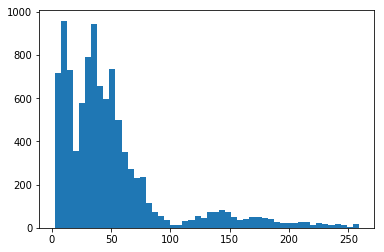

In [9]:
calc_confidence_interval(xm=XM, alpha = 7, n = 10000)